In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection
import sklearn.tree as trees
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree._tree import TREE_LEAF
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, auc, roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


In [29]:
data = pd.read_csv('processed.cleveland.data')
data = data[data != '?']
data.dropna(inplace=True)

#data = data[data.notnull()]
keys = data.keys()
names = ('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num')
dic = {keys[k]: names[k] for k in range(len(keys))}
data.columns=names
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
#features = ['Hits','Years']

#data.loc[(data['num'] > 0)] = 1


data.num[data.num > 0] = 1 
data.num[data.num == 0] = 0


Y = data['num']
X = data[features]
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.33)
#print(Y)

/home/clarko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/clarko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:


maxTrees= 300
n0 = 2
x = np.arange(n0,maxTrees)
testBag = np.zeros((maxTrees-n0))
testRan = np.zeros((maxTrees-n0))
oobBag = np.zeros((maxTrees-n0))
oobRan = np.zeros((maxTrees-n0))
arbol = trees.DecisionTreeRegressor(min_samples_split =0.05,min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0).fit(X_train, Y_train)

singleTree = np.array([mse(Y_test,arbol.predict(X_test))]*20)
tran = RandomForestRegressor(n_estimators=n0, 
                               warm_start=True, oob_score=True,max_features="sqrt",bootstrap=True,random_state=300, min_samples_leaf=1)#, min_samples_split=0.05)


tbag = BaggingClassifier(n_estimators=n0, warm_start=False, oob_score=True,bootstrap=True,random_state=300)

for i in range(n0,maxTrees):
    tran.set_params(n_estimators=i)
    tran.fit(X_train, Y_train)
    oobRan[i-n0] = (1.0-tran.oob_score_)*((Y_test - Y_test.mean()) ** 2).sum()/len(Y_test)
    testRan[i-n0] = mse(y_true=Y_test, y_pred=tran.predict(X_test))
    
    tbag.set_params(n_estimators=i)
    tbag.fit(X_train, Y_train)
    oobBag[i-n0] = (1.0-tbag.oob_score_)*((Y_test - Y_test.mean()) ** 2).sum()/len(Y_test)
    testBag[i-n0] = mse(y_true=Y_test, y_pred=tbag.predict(X_test))
    #print(testRan[i-n0])
    

/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/p

/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3

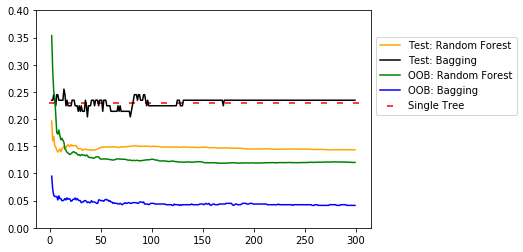

In [31]:

plt.scatter(np.linspace(n0,maxTrees,len(singleTree)),singleTree, color = 'r', marker='_', label = 'Single Tree')
plt.plot(x,testRan, label = 'Test: Random Forest',color='orange')
plt.plot(x,testBag, label = 'Test: Bagging', color = 'black')

plt.plot(x,oobRan, label= 'OOB: Random Forest',color = 'green')
plt.plot(x,oobBag, label= 'OOB: Bagging',  color = 'blue')
plt.ylim(0,0.4)
#plt.legend(loc=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.savefig("f88.png", bbox_inches="tight")

In [32]:
#!wget https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/OJ.csv

    

In [33]:
data = pd.read_csv('OJ.csv')
#data = data[data != '?']
#data.dropna(inplace=True)

llaves = list(data.keys())
llaves.pop(14)
llaves.pop(0)
llaves.pop(0)


#data.num[data.num > 0] = 1 
#data.num[data.num == 0] = 0
#data.Purchase[data.Purchase == 'CH'] = 1 #Citrus Hill
#data.Purchase[data.Purchase == 'MM'] = 0 #Minute Maid Orange Juice

print(llaves)

Y = data['Purchase']
Y[Y == 'CH'] = 1
Y[Y == 'MM'] = 0
Y=Y.astype('int')
X = data[llaves]


# Split in train and test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.5)


['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE']


/home/clarko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clarko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
maxTrees= 300
n0 = 2
x = np.arange(n0,maxTrees)

testRan0 = np.zeros((maxTrees-n0))
testRan1 = np.zeros((maxTrees-n0))
testRan2 = np.zeros((maxTrees-n0))

ran0 = RandomForestRegressor(n_estimators=n0, 
                               warm_start=True, oob_score=True,
                               max_features=None,bootstrap=True,
                               random_state=300, min_samples_leaf=1)#, min_samples_split=0.05)

ran1 = RandomForestRegressor(n_estimators=n0, 
                               warm_start=True, oob_score=True,
                               max_features=0.5,bootstrap=True,
                               random_state=300, min_samples_leaf=1)#, min_samples_split=0.05)

ran2 = RandomForestRegressor(n_estimators=n0, 
                               warm_start=True, oob_score=True,
                               max_features="sqrt",bootstrap=True,
                               random_state=300, min_samples_leaf=1)#, min_samples_split=0.05)




for i in range(n0,maxTrees):
    ran0.set_params(n_estimators=i)
    ran0.fit(X_train, Y_train)
    testRan0[i-n0] = mse(y_true=Y_test, y_pred=ran0.predict(X_test))
    
    ran1.set_params(n_estimators=i)
    ran1.fit(X_train, Y_train)
    testRan1[i-n0] = mse(y_true=Y_test, y_pred=ran1.predict(X_test))
    
    
    ran2.set_params(n_estimators=i)
    ran2.fit(X_train, Y_train)
    testRan2[i-n0] = mse(y_true=Y_test, y_pred=ran2.predict(X_test))


/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  

/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/clarko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  

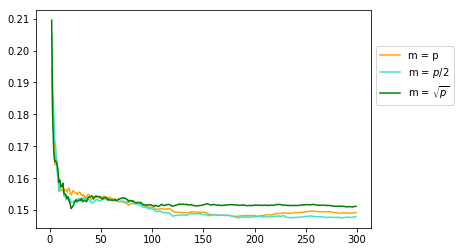

In [35]:
plt.plot(x,testRan0 ,label = 'm = p',color='orange')
plt.plot(x,testRan1 ,label = r'm = $p/2$',color='turquoise')
plt.plot(x,testRan2 ,label = 'm = $\sqrt{p}$',color='green')


#lt.ylim(0,0.4)
#plt.legend(loc=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.savefig("f810.png", bbox_inches="tight")

In [55]:
def prAUC(y_true, y_score):
    precision, recall, thresholds = precision_recall_curve(y_true, y_score[:, 1])
    return auc(recall, precision)

In [64]:
maxTrees= 300
n0 = 2
x = np.arange(n0,maxTrees)

testRan = np.zeros((maxTrees-n0))


ptre = trees.DecisionTreeRegressor(min_samples_split =0.05,min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0).fit(X_train, Y_train)

pran = RandomForestRegressor(n_estimators=300, 
                               warm_start=False, oob_score=False,
                               max_features=None,bootstrap=True,
                               random_state=300, min_samples_leaf=1)#, min_samples_split=0.05)

plin = LinearDiscriminantAnalysis(solver='lsqr')
plin.fit(X_train,Y_train)

ptre.fit(X_train,Y_train)

ptreROC = cross_val_score(estimator=ptre,scoring=make_scorer(average_precision_score,greater_is_better=True), X=X_test, y=Y_test, cv = 6).mean()

pran.fit(X_train,Y_train)
pranROC = cross_val_score(estimator=pran,scoring=make_scorer(average_precision_score,greater_is_better=True), X=X_test, y=Y_test, cv = 6).mean()

plog = sklearn.linear_model.LogisticRegression(class_weight='balanced')
plog.fit(X_train, Y_train)

plinROC = cross_val_score(estimator=plin,scoring=make_scorer(average_precision_score,greater_is_better=True), X=X_test, y=Y_test, cv = 6).mean()
plogROC = cross_val_score(estimator=plog,scoring=make_scorer(average_precision_score,greater_is_better=True), X=X_test, y=Y_test, cv = 6).mean()
#predict = plog.predict(X_test)


#proba_yes = plog.predict_proba(X_test)[:,1]


#fpr, tpr, thresholds = precision_recall_curve(Y_test, proba_yes)


# loop over n_p different values for the threshold probabiity
n_p = 60

print("EL score para Random Forest es: ", pranROC)
print("EL score para Decision Tree es: ", ptreROC)
print("EL score para Logistic Regression es: ", plogROC)
print("EL score para Linear Discriminant Analysis es: ", plinROC)

print("El mejor predictor es Random Forest con score: " , pranROC)

EL score para Random Forest es:  0.9015664859410016
EL score para Decision Tree es:  0.860512914813496
EL score para Logistic Regression es:  0.8237818548980697
EL score para Linear Discriminant Analysis es:  0.810670422788944
El mejor predictor es Random Forest con score:  0.9015664859410016
